## 將learnrate從0.087改成0.095
## 並將epochs從12改成6
## 發現正確率只有0.75
## 所以將batch_size改成180
## 發現正確率只剩0.72
## 所以直接在讓他訓練一次(用上面的條件)
## 最後正確率是0.79

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 讀入函式

In [107]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [132]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [108]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [109]:
x_train.shape

(60000, 28, 28)

## Channel

### CNN 要注意一張圖有多少個 channel, 一開始只有灰階, 所以只有一個 channel。
### 因此我們要轉一下我們的資料格式:(28,28) --> (28, 28, 1)

In [110]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [111]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [112]:
x_train[26].shape

(28, 28, 1)

In [113]:
y_train[26]

0

In [114]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 1.打造函數學習機 (CNN)

In [115]:
model = Sequential()

In [116]:
# 16 filter 數量 （3, 3）filter 大小
# padding='same': 輸入 28x28 輸出28x28
model.add(Conv2D(16, (3,3), padding='same',input_shape=(28,28,1),activation='relu'))
# 輸出 16個 28x28 矩陣， 28x28 疊了16層
# 事實上（28, 28, 16）

In [117]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [118]:
model.add(Conv2D(32, (3,3), padding='same',activation='relu'))

In [119]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [120]:
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))

In [121]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [122]:
model.add(Flatten())  #拉平

In [123]:
model.add(Dense(54, activation='relu'))

In [124]:
model.add(Dense(10, activation='softmax'))

In [125]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)              

In [126]:
model.compile(loss='mse', optimizer=SGD(lr=0.095),metrics=['accuracy'])

##  2. fit

In [140]:
model.fit(x_train, y_train, batch_size=180, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 22s 361us/sample - loss: 0.0361 - accuracy: 0.7434
Epoch 2/6
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0337 - accuracy: 0.7624
Epoch 3/6
60000/60000 [==============================] - 23s 382us/sample - loss: 0.0323 - accuracy: 0.7722
Epoch 4/6
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0310 - accuracy: 0.7835
Epoch 5/6
60000/60000 [==============================] - 22s 375us/sample - loss: 0.0301 - accuracy: 0.7897
Epoch 6/6
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0292 - accuracy: 0.7962


## 3.預測

In [141]:
result = model.predict_classes(x_test)

In [142]:
def my_predict(n):
    print('我的 CNN 預測是', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [143]:
from ipywidgets import interact_manual

In [144]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

我的 CNN 預測是 Bag


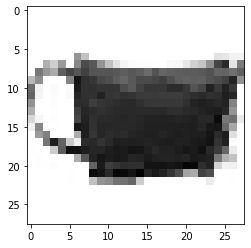

In [149]:
my_predict(2609)

In [145]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 126us/sample - loss: 0.0302 - accuracy: 0.7909


In [146]:
loss, acc = score

In [147]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.7909


# 把model存起來

In [148]:
model.save('myCNNmodel.h5')